In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from scipy.interpolate import interp1d
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import multiprocessing
from subprocess import Popen, PIPE, STDOUT

from multiprocessing import Process, Queue
# from joblib import Parallel, delayed
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn import metrics
from sklearn.cross_validation import train_test_split

Automatically created module for IPython interactive environment


# for including Sex and Age information

In [270]:
#data0=pd.read_csv("Demo_Label1_1Day.csv",header=None, index_col=None)
#data0.columns = [ "Age","Sex","Label"]
data0=pd.read_csv("Demo_Label1_1Day_Someothervalues.csv",header=None, index_col=None)
data0.columns = [ "Age","Sex","Label"]

In [271]:
#data1=pd.read_csv("cA2__1Day_Label1.csv",header=None, index_col=None)
#data=data.transpose()
#X0=data.loc[:,0:9]
data1=pd.read_csv("cA2__1Day_Label1_Someothervalues.csv",header=None, index_col=None)
data1=data1.transpose()
#X0=data.loc[:,0:9]


In [272]:
data1

,0,1,2,3,4,5,6,7,8,9
0,1.035700e+01,1.044300e+01,5.444700,6.04580,7.141800,6.841000e+00,1.018000e+01,8.543700,8.333900e+00,1.291600e+01
1,5.908200e+00,5.879500e+00,5.085600,2.68290,3.069500,7.974000e+00,1.161200e+01,10.752000,9.127200e+00,8.080900e+00
2,1.725700e+01,1.616200e+01,4.593800,5.28450,14.610000,1.549400e+01,1.446900e+01,16.087000,1.037900e+01,1.322500e+01
3,8.189700e+00,7.960900e+00,12.751000,14.90200,13.688000,1.242000e+01,1.094400e+01,9.977100,1.093700e+01,1.192400e+01
4,1.186700e+01,1.183800e+01,10.140000,10.41200,11.891000,1.353600e+01,1.413300e+01,12.936000,1.788300e+01,1.272600e+01
5,6.130200e+00,6.173600e+00,7.290200,7.56320,7.117700,8.089800e+00,6.724800e+00,7.174800,1.164400e+01,6.878300e+00
6,6.000000e+00,6.000000e+00,6.000000,6.00170,5.940900,6.544200e+00,7.713100e+00,6.538300,6.000000e+00,6.000000e+00
7,1.718400e+01,1.664300e+01,10.494000,10.83200,12.163000,1.377000e+01,1.267300e+01,13.696000,1.306800e+01,1.470500e+01
8,1.361900e+01,1.371400e+01,13.648000,11.66000,13.409000,1.558100e+01,1.293000e+01,11.600000,1.269900e+01,1.160500e+01
9,1.729200e-13,3.404400e-13,0.019051,0.55575,1.462800,2.688300e-12,5.837400e-03,-0.185890,4.998200e+00,9.640900e+00


In [273]:
data=[data1,data0]
data=pd.concat(data,axis=1)


In [274]:
data

,0,1,2,3,4,5,6,7,8,9,Age,Sex,Label
0,1.035700e+01,1.044300e+01,5.444700,6.04580,7.141800,6.841000e+00,1.018000e+01,8.543700,8.333900e+00,1.291600e+01,69,'FEMALE','Mild'
1,5.908200e+00,5.879500e+00,5.085600,2.68290,3.069500,7.974000e+00,1.161200e+01,10.752000,9.127200e+00,8.080900e+00,60,'FEMALE','Mild'
2,1.725700e+01,1.616200e+01,4.593800,5.28450,14.610000,1.549400e+01,1.446900e+01,16.087000,1.037900e+01,1.322500e+01,68,'FEMALE','Mild'
3,8.189700e+00,7.960900e+00,12.751000,14.90200,13.688000,1.242000e+01,1.094400e+01,9.977100,1.093700e+01,1.192400e+01,77,'FEMALE','Not'
4,1.186700e+01,1.183800e+01,10.140000,10.41200,11.891000,1.353600e+01,1.413300e+01,12.936000,1.788300e+01,1.272600e+01,35,'MALE',''
5,6.130200e+00,6.173600e+00,7.290200,7.56320,7.117700,8.089800e+00,6.724800e+00,7.174800,1.164400e+01,6.878300e+00,46,'FEMALE','Mild'
6,6.000000e+00,6.000000e+00,6.000000,6.00170,5.940900,6.544200e+00,7.713100e+00,6.538300,6.000000e+00,6.000000e+00,39,'MALE','Mild'
7,1.718400e+01,1.664300e+01,10.494000,10.83200,12.163000,1.377000e+01,1.267300e+01,13.696000,1.306800e+01,1.470500e+01,63,'FEMALE','Not'
8,1.361900e+01,1.371400e+01,13.648000,11.66000,13.409000,1.558100e+01,1.293000e+01,11.600000,1.269900e+01,1.160500e+01,55,'FEMALE','Not'
9,1.729200e-13,3.404400e-13,0.019051,0.55575,1.462800,2.688300e-12,5.837400e-03,-0.185890,4.998200e+00,9.640900e+00,65,'FEMALE','Mild'


In [275]:
data=data[data.Label.str.contains("''") == False]


In [276]:
data

,0,1,2,3,4,5,6,7,8,9,Age,Sex,Label
0,1.035700e+01,1.044300e+01,5.444700,6.04580,7.14180,6.841000e+00,10.180000,8.54370,8.333900e+00,1.291600e+01,69,'FEMALE','Mild'
1,5.908200e+00,5.879500e+00,5.085600,2.68290,3.06950,7.974000e+00,11.612000,10.75200,9.127200e+00,8.080900e+00,60,'FEMALE','Mild'
2,1.725700e+01,1.616200e+01,4.593800,5.28450,14.61000,1.549400e+01,14.469000,16.08700,1.037900e+01,1.322500e+01,68,'FEMALE','Mild'
3,8.189700e+00,7.960900e+00,12.751000,14.90200,13.68800,1.242000e+01,10.944000,9.97710,1.093700e+01,1.192400e+01,77,'FEMALE','Not'
5,6.130200e+00,6.173600e+00,7.290200,7.56320,7.11770,8.089800e+00,6.724800,7.17480,1.164400e+01,6.878300e+00,46,'FEMALE','Mild'
6,6.000000e+00,6.000000e+00,6.000000,6.00170,5.94090,6.544200e+00,7.713100,6.53830,6.000000e+00,6.000000e+00,39,'MALE','Mild'
7,1.718400e+01,1.664300e+01,10.494000,10.83200,12.16300,1.377000e+01,12.673000,13.69600,1.306800e+01,1.470500e+01,63,'FEMALE','Not'
8,1.361900e+01,1.371400e+01,13.648000,11.66000,13.40900,1.558100e+01,12.930000,11.60000,1.269900e+01,1.160500e+01,55,'FEMALE','Not'
9,1.729200e-13,3.404400e-13,0.019051,0.55575,1.46280,2.688300e-12,0.005837,-0.18589,4.998200e+00,9.640900e+00,65,'FEMALE','Mild'
10,6.111700e-13,-2.860900e-01,1.714000,0.68792,-0.14647,9.601500e-01,5.039200,6.91310,1.415800e+01,1.220700e+01,65,'MALE','Mild'


In [277]:
class_le = LabelEncoder()
data['Sex'] = class_le.fit_transform(data['Sex'].values)
data['Label'] = class_le.fit_transform(data['Label'].values)

C:\Users\BME-LADM-Baharloo\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\BME-LADM-Baharloo\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [278]:
data

,0,1,2,3,4,5,6,7,8,9,Age,Sex,Label
0,1.035700e+01,1.044300e+01,5.444700,6.04580,7.14180,6.841000e+00,10.180000,8.54370,8.333900e+00,1.291600e+01,69,0,0
1,5.908200e+00,5.879500e+00,5.085600,2.68290,3.06950,7.974000e+00,11.612000,10.75200,9.127200e+00,8.080900e+00,60,0,0
2,1.725700e+01,1.616200e+01,4.593800,5.28450,14.61000,1.549400e+01,14.469000,16.08700,1.037900e+01,1.322500e+01,68,0,0
3,8.189700e+00,7.960900e+00,12.751000,14.90200,13.68800,1.242000e+01,10.944000,9.97710,1.093700e+01,1.192400e+01,77,0,1
5,6.130200e+00,6.173600e+00,7.290200,7.56320,7.11770,8.089800e+00,6.724800,7.17480,1.164400e+01,6.878300e+00,46,0,0
6,6.000000e+00,6.000000e+00,6.000000,6.00170,5.94090,6.544200e+00,7.713100,6.53830,6.000000e+00,6.000000e+00,39,1,0
7,1.718400e+01,1.664300e+01,10.494000,10.83200,12.16300,1.377000e+01,12.673000,13.69600,1.306800e+01,1.470500e+01,63,0,1
8,1.361900e+01,1.371400e+01,13.648000,11.66000,13.40900,1.558100e+01,12.930000,11.60000,1.269900e+01,1.160500e+01,55,0,1
9,1.729200e-13,3.404400e-13,0.019051,0.55575,1.46280,2.688300e-12,0.005837,-0.18589,4.998200e+00,9.640900e+00,65,0,0
10,6.111700e-13,-2.860900e-01,1.714000,0.68792,-0.14647,9.601500e-01,5.039200,6.91310,1.415800e+01,1.220700e+01,65,1,0


In [279]:
X=[data.loc[:,0],data.loc[:,1],data.loc[:,2],data.loc[:,3],data.loc[:,4],data.loc[:,5],data.loc[:,6],data.loc[:,7],data.loc[:,8],data.loc[:,9],data.loc[:,'Age'],data.loc[:,'Sex']]
X=pd.concat(X,axis=1)
y=data.loc[:,'Label']


In [280]:
y.sum()

36L

# In the case you need to include the information of both detail and approximate

In [243]:
data1 = pd.read_csv("cA4_2days.csv",header=None, index_col=None)
data1 =data1.transpose()


In [244]:
data2 = pd.read_csv("cD4_2days.csv",header=None, index_col=None)
data2 =data2.transpose()


In [245]:
X1=data1.loc[:,0:5]
X2=data2.loc[:,0:5]

In [246]:
X=[X1,X2]

y=data2.loc[:,6]

In [204]:
data3 = pd.read_csv("cA3.csv",header=None, index_col=None)
data3 =data3.transpose()

In [205]:
data4 = pd.read_csv("cD3.csv",header=None, index_col=None)
data4 =data4.transpose()

In [206]:
X1=data1.loc[:,0:9]
X2=data2.loc[:,0:9]
X3=data3.loc[:,0:5]
X4=data4.loc[:,0:5]
X=[X1,X2,X3,X4]

y=data2.loc[:,10]



In [247]:
X=pd.concat(X,axis=1)



# Split data into train and test

In [281]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.25, random_state=0)
print('Train set size %s' % (X_train.shape,))
print('Test set size %s' % (X_test.shape,))

Train set size (72, 12)
Test set size (25, 12)


Automatically created module for IPython interactive environment

learning on dataset PostOperativePain
training: constant learning-rate
Training set score: 0.847222
Training set loss: 0.367722
training: constant with momentum
Training set score: 0.652778
Training set loss: 0.669566
training: constant with Nesterov's momentum
Training set score: 0.972222
Training set loss: 0.161330
training: adam
Training set score: 1.000000
Training set loss: 0.013618

learning on dataset PostOperativePain
training: constant learning-rate
Training set score: 0.847222
Training set loss: 0.367722
training: constant with momentum
Training set score: 0.652778
Training set loss: 0.669566
training: constant with Nesterov's momentum
Training set score: 0.972222
Training set loss: 0.161330
training: adam
Training set score: 1.000000
Training set loss: 0.013618


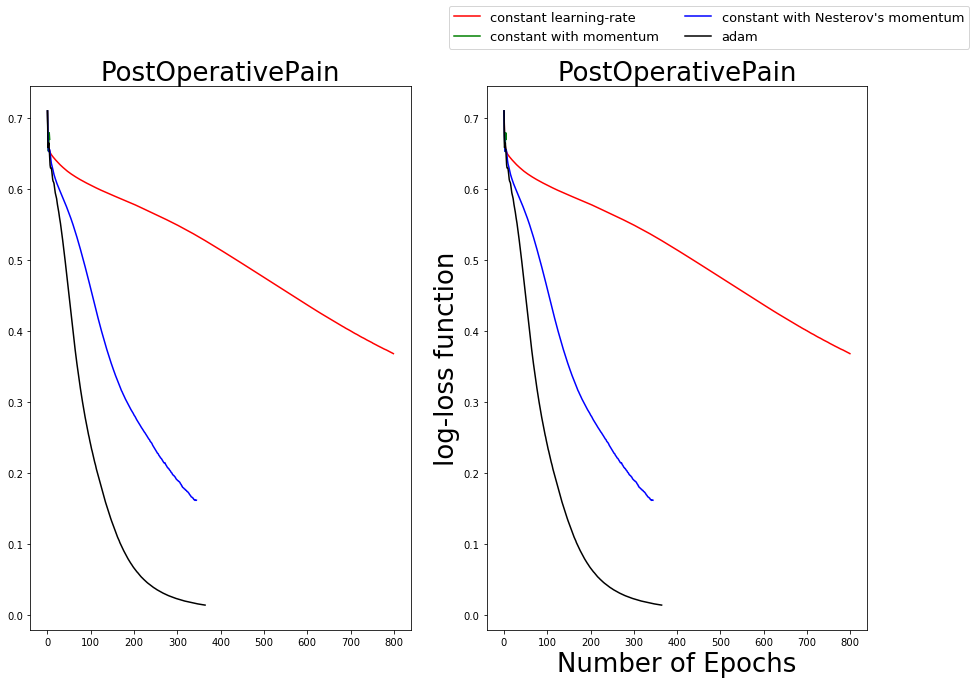

In [282]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
#params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 
 #          'learning_rate_init': 0.15},
#         {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
#            'nesterovs_momentum': False, 'learning_rate_init': 0.2},
#           {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
 #           'nesterovs_momentum': True, 'learning_rate_init': 0.1},
#           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
#            'learning_rate_init': 0.01},
#           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
#            'nesterovs_momentum': True, 'learning_rate_init': 0.2},
#           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
#            'nesterovs_momentum': False, 'learning_rate_init': 0.2},
 #          {'solver': 'adam', 'learning_rate_init': 0.01}]

params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 
           'learning_rate_init': 0.15},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.1},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

# labels = ["constant learning-rate", "constant with momentum",
#           "constant with Nesterov's momentum",
#           "inv-scaling learning-rate", "inv-scaling with momentum",
#           "inv-scaling with Nesterov's momentum", "adam"]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum","adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'black', 'linestyle': '-'}]

#  plot_args = [{'c': 'red', 'linestyle': '-'},
#               {'c': 'green', 'linestyle': '-'},
#               {'c': 'blue', 'linestyle': '-'},
#               {'c': 'red', 'linestyle': '--'},
#               {'c': 'green', 'linestyle': '--'},
#               {'c': 'blue', 'linestyle': '--'},
#               {'c': 'black', 'linestyle': '-'}]

def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name,fontsize=26)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 800

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1,2,figsize=(15, 10))
plt.plot(linewidth=4.0)
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [(X_train, y_train),(X_train, y_train)]
plt.xlabel('Number of Epochs',fontsize=26)
plt.ylabel('log-loss function',fontsize=26)
for ax, data, name in zip(axes.ravel(), data_sets, ['PostOperativePain','PostOperativePain']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels=labels, ncol=2, loc="upper right",prop={'size':13})
plt.show()

# I  did not use this part

In [107]:

mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=800,solver='sgd', learning_rate='constant', momentum=.9,
           nesterovs_momentum= False, learning_rate_init= 0.2)
mlp.fit(X_train, y_train)
#mlp.append(mlp)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Training set loss: %f" % mlp.loss_)

Training set score: 0.650794
Training set loss: 1.062477


In [108]:
from sklearn.metrics import accuracy_score
expected = y_test
predicted =mlp.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         4
        1.0       0.80      0.94      0.86        17

avg / total       0.65      0.76      0.70        21

[[ 0  4]
 [ 1 16]]


0.76190476190476186

# Up to here

In [283]:
mlp = MLPClassifier(hidden_layer_sizes=(32, ),verbose=0, random_state=0,max_iter=800,learning_rate_init=0.001)
mlp.fit(X_train, y_train)
#mlp.append(mlp)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Training set loss: %f" % mlp.loss_)

Training set score: 0.597222
Training set loss: 1.173459


In [284]:
from sklearn.metrics import accuracy_score
expected = y_test
predicted =mlp.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)

             precision    recall  f1-score   support

          0       0.91      0.71      0.80        14
          1       0.71      0.91      0.80        11

avg / total       0.82      0.80      0.80        25

[[10  4]
 [ 1 10]]


0.80000000000000004